Implementation of the Adam (Batch Version) algorithm to train a multivariable linear regression model
 Then Update The implementation to work for mini-batch Using "MultipleLR" Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("MultipleLR.csv" , names=['x1' , 'x2' , 'x3' , 'y'])
print(Data)

    x1  x2   x3    y
0   73  80   75  152
1   93  88   93  185
2   89  91   90  180
3   96  98  100  196
4   73  66   70  142
5   53  46   55  101
6   69  74   77  149
7   47  56   60  115
8   87  79   90  175
9   79  70   88  164
10  69  70   73  141
11  70  65   74  141
12  93  95   91  184
13  79  80   73  152
14  70  73   78  148
15  93  89   96  192
16  78  75   68  147
17  81  90   93  183
18  88  92   86  177
19  78  83   77  159
20  82  86   90  177
21  86  82   89  175
22  78  83   85  175
23  76  83   71  149
24  96  93   95  192


In [3]:
Data.insert(0 , 'Ones' , 1)
print(Data)

    Ones  x1  x2   x3    y
0      1  73  80   75  152
1      1  93  88   93  185
2      1  89  91   90  180
3      1  96  98  100  196
4      1  73  66   70  142
5      1  53  46   55  101
6      1  69  74   77  149
7      1  47  56   60  115
8      1  87  79   90  175
9      1  79  70   88  164
10     1  69  70   73  141
11     1  70  65   74  141
12     1  93  95   91  184
13     1  79  80   73  152
14     1  70  73   78  148
15     1  93  89   96  192
16     1  78  75   68  147
17     1  81  90   93  183
18     1  88  92   86  177
19     1  78  83   77  159
20     1  82  86   90  177
21     1  86  82   89  175
22     1  78  83   85  175
23     1  76  83   71  149
24     1  96  93   95  192


In [4]:
X=Data.iloc[: , 0:4]
y = Data.iloc[: , -1]
print(y.shape)

(25,)


In [5]:
Data

,Ones,x1,x2,x3,y
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142
5,1,53,46,55,101
6,1,69,74,77,149
7,1,47,56,60,115
8,1,87,79,90,175
9,1,79,70,88,164


In [6]:
X

,Ones,x1,x2,x3
0,1,73,80,75
1,1,93,88,93
2,1,89,91,90
3,1,96,98,100
4,1,73,66,70
5,1,53,46,55
6,1,69,74,77
7,1,47,56,60
8,1,87,79,90
9,1,79,70,88


### 1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


In [7]:
def MultiAdamGradientDescent (X , y , alpha ,epochs , Epsilon , Betta0,Betta1 ) :
    costs=[]
    thetalist=[]
    H_Thetalist=[]
    theta =np.zeros(X.shape[1])
    vt=np.zeros(X.shape[1])
    mt=np.zeros(X.shape[1])
    Grad_Thetalist=[]
    m=len(X)
    for i in range(epochs) : 
        H_Theta =  X @ theta 
        H_Thetalist.append(H_Theta)

        Z = H_Theta - y
        Z_Norm = np.linalg.norm(Z)

        Loss = (1/(2* m))*np.power(Z_Norm , 2)  
        costs.append(Loss)

        Grad_Theta = (1/m) * (X.T @ Z  )
        Grad_Thetalist.append(Grad_Theta)
        mt=Betta0* mt + (1-Betta0) * Grad_Theta
        mt_hat = mt / (1 - (Betta0**(i+1)))
        vt= Betta1 * vt+ (1-Betta1) * np.power(Grad_Theta , 2)
        vt_hat = vt / ( 1 - (Betta1**(i+1)))

        theta =theta - (alpha / (np.sqrt(vt_hat) + Epsilon)) * mt_hat
        thetalist.append(theta)
        if i > 0 :
            if abs(costs[i-1] - costs[i]) < 0.001 :
                break
            if abs(np.linalg.norm(Grad_Thetalist[i-1]) - np.linalg.norm(Grad_Thetalist[i])) < 0.001 :
                break
                
    return thetalist , costs , H_Thetalist , theta

In [8]:
alpha = 0.0009
epochs=1000
Epsilon = 10E-8
Betta0=0.9
Betta1=0.9
thetalist, costs , H_Thetalist , theta = MultiAdamGradientDescent(X , y , alpha ,epochs , Epsilon , Betta0,Betta1 )
# print("thetalist0 = " , thetalist0 , "\n")
# print("thetalist1 = " , thetalist0 , "\n")
# print("costs = " , costs , "\n")
# print("H_Thetalist = " , H_Thetalist , "\n")

for i in range(len(theta)):
    print("Theta",i,"=" , theta[i] , "\n")

Theta 0 = 0.671743165446066 

Theta 1 = 0.6708080368782714 

Theta 2 = 0.6704983044091266 

Theta 3 = 0.6774170376840492 



### calculate R2 score

In [9]:
H_Theta = X @ theta
print("Predict : \n" , H_Theta)

Predict : 
 0     154.086872
1     185.060526
2     182.356538
3     198.519852
4     141.312811
5     104.325428
6     148.735484
7     110.392648
8     172.968942
9     160.213159
10    143.343823
11    141.339556
12    188.399180
13    156.756886
14    149.413211
15    187.763275
16    149.346501
17    178.351826
18    179.646560
19    160.807241
20    174.308390
21    173.632212
22    166.226578
23    155.401123
24    191.780276
dtype: float64


In [10]:
SSres = np.sum(np.power((y - H_Theta) , 2))
y_Mean = np.mean(y)
SStot = np.sum(np.power((y - y_Mean) , 2))
RSqaure = 1 - (SSres / SStot)
print(RSqaure)

0.9784082189213092


### Plot loss vs. Iterations

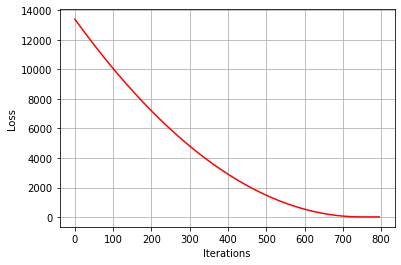

In [11]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(  costs , color='red')
plt.grid()
plt.show()

### Plot Theta_0 vs. loss 

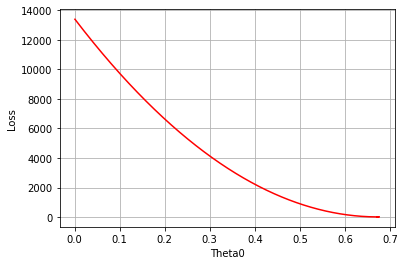

In [12]:
theta0=[t[0] for t in thetalist ]
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.plot(  theta0 ,costs , color='red')
plt.grid()
plt.show()

### Plot Theta_1 vs. loss 

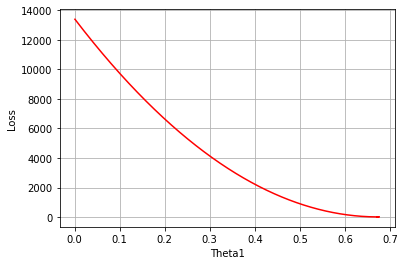

In [13]:
theta1=[t[1] for t in thetalist ]
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.plot(  theta1 ,costs , color='red')
plt.grid()
plt.show()

### Plot Theta_2 vs. loss 

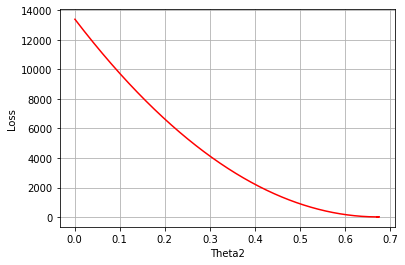

In [14]:
theta2=[t[2] for t in thetalist ]
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.plot(  theta2 ,costs , color='red')
plt.grid()
plt.show()

### Plot Theta_3 vs. loss 

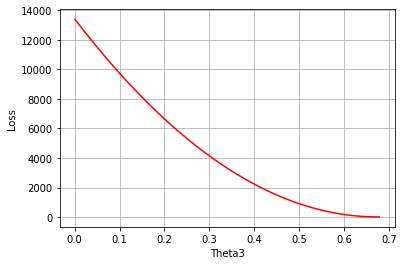

In [15]:
theta3=[t[3] for t in thetalist ]
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.plot(  theta3 ,costs , color='red')
plt.grid()
plt.show()

### 2. Update your implementation to work for mini-batch.

In [16]:
def create_batch(X, Y, batch_size) :
    mini_batches=[]
    no_of_batches=X.shape[0]//batch_size
    for i in range(no_of_batches):
        mini_batch=Data[i*batch_size:(i+1)*batch_size]
        mini_batches.append((mini_batch.iloc[:, 0:4],mini_batch.iloc[:, -1]))
    if X.shape[0]%batch_size!=0:
            mini_batch=Data[(i+1)*batch_size:]
            mini_batches.append((mini_batch.iloc[:, 0:4],mini_batch.iloc[:, -1]))
    return mini_batches

In [17]:
def MinibatchMultiAdamGradientDescent (X , y , alpha ,epochs , batch_size, Epsilon , Betta0,Betta1 ) :
    costs=[]
    thetalist=[]
    H_Thetalist=[]
    vt=np.zeros(X.shape[1])
    mt=np.zeros(X.shape[1])
    Grad_Thetalist=[]
    theta =  np.zeros(X.shape[1])
    m=len(X)
    no_of_batches=X.shape[0]//batch_size
    for i in range(epochs) : 
        batches=create_batch(X,y,batch_size)
        
        for batch in batches :
            xb=batch[0]
            yb=batch[1]

            H_Theta =  xb @ theta
            H_Thetalist.append(H_Theta)
            
            Z = H_Theta - yb
            Loss = (1/(2* no_of_batches))*np.sum(np.power(Z , 2))
            
            Grad_Theta = (1/no_of_batches) * (xb.T @ Z )
            
            mt=Betta0* mt + (1-Betta0) * Grad_Theta
            mt_hat = mt / (1 - (Betta0**(i+1)))
            vt= Betta1 * vt+ (1-Betta1) * np.power(Grad_Theta , 2)
            vt_hat = vt / ( 1 - (Betta1**(i+1)))
            
            theta =theta - (alpha / (np.sqrt(vt_hat) + Epsilon)) * mt_hat
            
        thetalist.append(theta)
        Grad_Thetalist.append(Grad_Theta)
        H_Theta_total = X @ theta
        Z_total = H_Theta_total - y
        costs.append((1/(2* no_of_batches))*np.sum(np.power(Z_total , 2)))
        if i > 0 :
            if abs(costs[i-1] - costs[i]) < 0.001 :
                break
            if abs(np.linalg.norm(Grad_Thetalist[i-1]) - np.linalg.norm(Grad_Thetalist[i])) < 0.001 :
                break
                
    return thetalist , costs , H_Thetalist , theta

In [18]:
alpha = 0.0005
epochs=500
batch_size= 4
Epsilon = 10E-8
Betta0=0.9
Betta1=0.9
Multi_Thetalist, Multi_Costs , Multi_H_Thetalist , Multi_Theta = MinibatchMultiAdamGradientDescent(X , y , alpha ,epochs , batch_size, Epsilon , Betta0,Betta1 )
# print("thetalist0 = " , thetalist0 , "\n")
# print("thetalist1 = " , thetalist0 , "\n")
# print("costs = " , costs , "\n")
# print("H_Thetalist = " , H_Thetalist , "\n")

for i in range(len(Multi_Theta)):
    print("Theta",i,"=" , Multi_Theta[i] , "\n")

Theta 0 = 0.6485683814278514 

Theta 1 = 0.6343887941635441 

Theta 2 = 0.6305169751481879 

Theta 3 = 0.750902821403028 



### calculate R2 score

In [19]:
Multi_H_Theta = X @ Multi_Theta
print("Predict : \n" , Multi_H_Theta)

Predict : 
 0     153.718020
1     184.966182
2     182.067470
3     198.430838
4     141.136268
5     104.574611
6     148.899169
7     110.827962
8     173.232488
9     160.980920
10    143.373489
11    141.606196
12    187.877996
13    156.022547
14    149.653943
15    187.849408
16    148.481059
17    178.614551
18    179.059987
19    160.283321
20    174.474163
21    173.738748
22    166.290543
23    154.509126
24    191.523739
dtype: float64


In [20]:
SSres = np.sum(np.power((y - Multi_H_Theta) , 2))
y_Mean = np.mean(y)
SStot = np.sum(np.power((y - y_Mean) , 2))
RSqaure = 1 - (SSres / SStot)
print(RSqaure)

0.9816059049827964


### Plot loss vs. Iterations

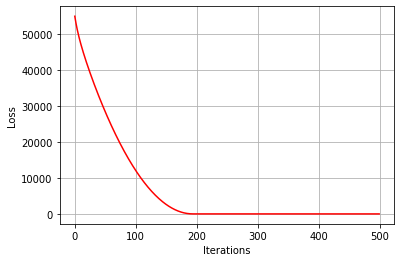

In [21]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(  Multi_Costs , color='red')
plt.grid()
plt.show()

### Plot Theta_0 vs. loss 

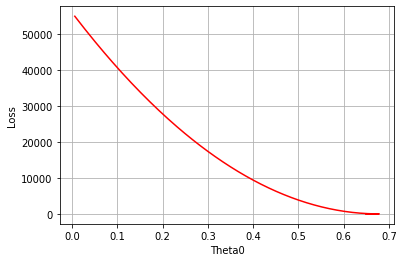

In [22]:
Theta0=[t[0] for t in Multi_Thetalist ]
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.plot(  Theta0 ,Multi_Costs , color='red')
plt.grid()
plt.show()


### Plot Theta_1 vs. loss 

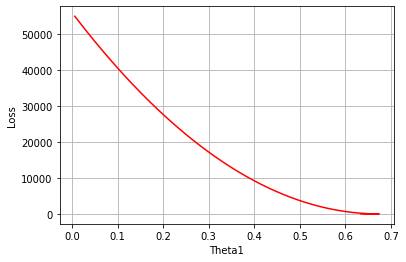

In [23]:
Theta1=[t[1] for t in Multi_Thetalist ]
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.plot(  Theta1 ,Multi_Costs , color='red')
plt.grid()
plt.show()

### Plot Theta_2 vs. loss 

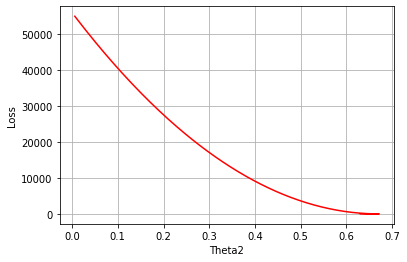

In [24]:
Theta2=[t[2] for t in Multi_Thetalist ]
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.plot(  Theta2 ,Multi_Costs , color='red')
plt.grid()
plt.show()

### Plot Theta_3 vs. loss 

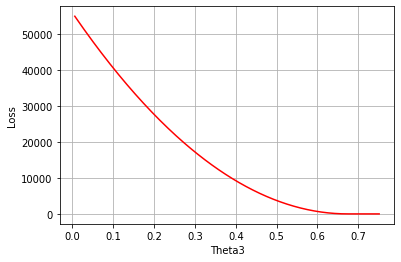

In [25]:
Theta3=[t[3] for t in Multi_Thetalist ]
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.plot(  Theta3 ,Multi_Costs , color='red')
plt.grid()
plt.show()

## With Shuffle Data

In [26]:
Data_Sh = Data.sample(frac=1, random_state=0)
print(Data_Sh)

    Ones  x1  x2   x3    y
5      1  53  46   55  101
2      1  89  91   90  180
19     1  78  83   77  159
16     1  78  75   68  147
11     1  70  65   74  141
22     1  78  83   85  175
17     1  81  90   93  183
24     1  96  93   95  192
23     1  76  83   71  149
14     1  70  73   78  148
1      1  93  88   93  185
10     1  69  70   73  141
13     1  79  80   73  152
8      1  87  79   90  175
6      1  69  74   77  149
18     1  88  92   86  177
4      1  73  66   70  142
9      1  79  70   88  164
7      1  47  56   60  115
20     1  82  86   90  177
3      1  96  98  100  196
0      1  73  80   75  152
21     1  86  82   89  175
15     1  93  89   96  192
12     1  93  95   91  184


In [27]:
X=Data_Sh.iloc[: , 0:4]
y = Data_Sh.iloc[: , -1]
print(y.shape)

(25,)


In [28]:
X

,Ones,x1,x2,x3
5,1,53,46,55
2,1,89,91,90
19,1,78,83,77
16,1,78,75,68
11,1,70,65,74
22,1,78,83,85
17,1,81,90,93
24,1,96,93,95
23,1,76,83,71
14,1,70,73,78


### 1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.

In [29]:
alpha = 0.0009
epochs=1000
Epsilon = 10E-8
Betta0=0.9
Betta1=0.9
thetalist, costs , H_Thetalist , theta = MultiAdamGradientDescent(X , y , alpha ,epochs , Epsilon , Betta0,Betta1 )
# print("thetalist0 = " , thetalist0 , "\n")
# print("thetalist1 = " , thetalist0 , "\n")
# print("costs = " , costs , "\n")
# print("H_Thetalist = " , H_Thetalist , "\n")

for i in range(len(theta)):
    print("Theta",i,"=" , theta[i] , "\n")

Theta 0 = 0.6717431654460658 

Theta 1 = 0.6708080368782715 

Theta 2 = 0.6704983044091265 

Theta 3 = 0.6774170376840492 



### calculate R2 score

In [30]:
H_Theta = X @ theta
print("Predict : \n" , H_Theta)

Predict : 
 5     104.325428
2     182.356538
19    160.807241
16    149.346501
11    141.339556
22    166.226578
17    178.351826
24    191.780276
23    155.401123
14    149.413211
1     185.060526
10    143.343823
13    156.756886
8     172.968942
6     148.735484
18    179.646560
4     141.312811
9     160.213159
7     110.392648
20    174.308390
3     198.519852
0     154.086872
21    173.632212
15    187.763275
12    188.399180
dtype: float64


In [31]:
SSres = np.sum(np.power((y - H_Theta) , 2))
y_Mean = np.mean(y)
SStot = np.sum(np.power((y - y_Mean) , 2))
RSqaure = 1 - (SSres / SStot)
print(RSqaure)

0.9784082189213092


### Plot loss vs. Iterations

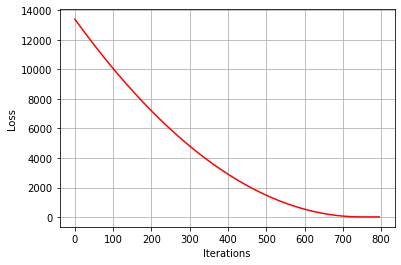

In [32]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(  costs , color='red')
plt.grid()
plt.show()

### Plot Theta_0 vs. loss 

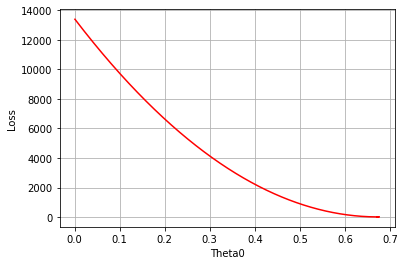

In [33]:
theta0=[t[0] for t in thetalist ]
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.plot(  theta0 ,costs , color='red')
plt.grid()
plt.show()

### Plot Theta_1 vs. loss 

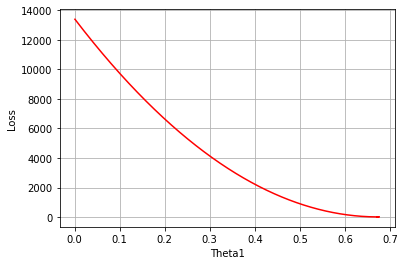

In [34]:
theta1=[t[1] for t in thetalist ]
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.plot(  theta1 ,costs , color='red')
plt.grid()
plt.show()

### Plot Theta_2 vs. loss 

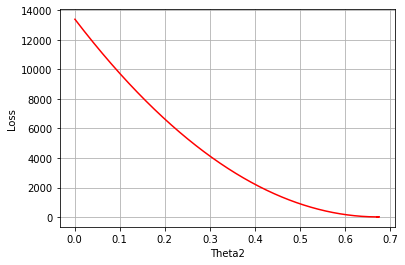

In [35]:
theta2=[t[2] for t in thetalist ]
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.plot(  theta2 ,costs , color='red')
plt.grid()
plt.show()

### Plot Theta_3 vs. loss 

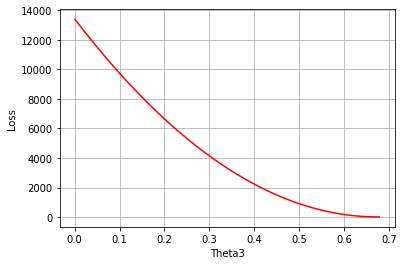

In [36]:
theta3=[t[3] for t in thetalist ]
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.plot(  theta3 ,costs , color='red')
plt.grid()
plt.show()

### 2. Update your implementation to work for mini-batch.

In [37]:
alpha = 0.0005
epochs=500
batch_size= 4
Epsilon = 10E-8
Betta0=0.9
Betta1=0.9
Multi_Thetalist, Multi_Costs , Multi_H_Thetalist , Multi_Theta = MinibatchMultiAdamGradientDescent(X , y , alpha ,epochs , batch_size, Epsilon , Betta0,Betta1 )
# print("thetalist0 = " , thetalist0 , "\n")
# print("thetalist1 = " , thetalist0 , "\n")
# print("costs = " , costs , "\n")
# print("H_Thetalist = " , H_Thetalist , "\n")

for i in range(len(Multi_Theta)):
    print("Theta",i,"=" , Multi_Theta[i] , "\n")

Theta 0 = 0.6485683814278514 

Theta 1 = 0.6343887941635441 

Theta 2 = 0.6305169751481879 

Theta 3 = 0.750902821403028 



### calculate R2 score

In [38]:
Multi_H_Theta = X @ Multi_Theta
print("Predict : \n" , Multi_H_Theta)

Predict : 
 5     104.574611
2     182.067470
19    160.283321
16    148.481059
11    141.606196
22    166.290543
17    178.614551
24    191.523739
23    154.509126
14    149.653943
1     184.966182
10    143.373489
13    156.022547
8     173.232488
6     148.899169
18    179.059987
4     141.136268
9     160.980920
7     110.827962
20    174.474163
3     198.430838
0     153.718020
21    173.738748
15    187.849408
12    187.877996
dtype: float64


In [39]:
SSres = np.sum(np.power((y - Multi_H_Theta) , 2))
y_Mean = np.mean(y)
SStot = np.sum(np.power((y - y_Mean) , 2))
RSqaure = 1 - (SSres / SStot)
print(RSqaure)

0.9816059049827964


### Plot loss vs. Iterations

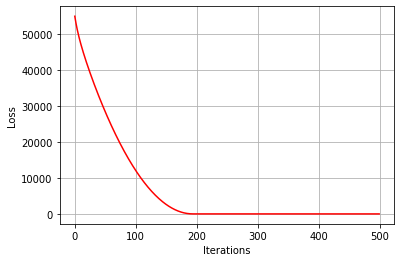

In [40]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(  Multi_Costs , color='red')
plt.grid()
plt.show()

### Plot Theta_0 vs. loss 

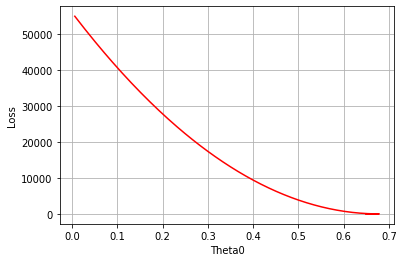

In [41]:
Theta0=[t[0] for t in Multi_Thetalist ]
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.plot(  Theta0 ,Multi_Costs , color='red')
plt.grid()
plt.show()


### Plot Theta_1 vs. loss 

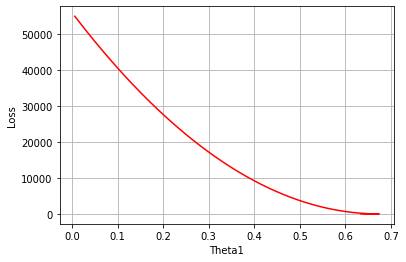

In [42]:
Theta1=[t[1] for t in Multi_Thetalist ]
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.plot(  Theta1 ,Multi_Costs , color='red')
plt.grid()
plt.show()

### Plot Theta_2 vs. loss 

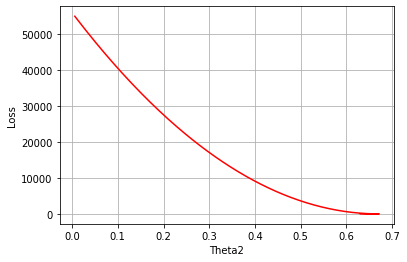

In [43]:
Theta2=[t[2] for t in Multi_Thetalist ]
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.plot(  Theta2 ,Multi_Costs , color='red')
plt.grid()
plt.show()

### Plot Theta_3 vs. loss 

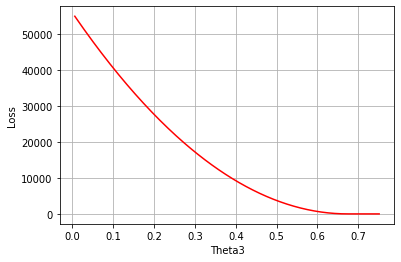

In [44]:
Theta3=[t[3] for t in Multi_Thetalist ]
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.plot(  Theta3 ,Multi_Costs , color='red')
plt.grid()
plt.show()